In [1]:
import pandas as pd
df=pd.read_csv('C:\\Users\\Asus\\Downloads\\Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [3]:
x=df[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
y=df['Exited']

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
ss=StandardScaler()
x=ss.fit_transform(x)

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=80)

In [7]:
import tensorflow
from keras.layers import Dense, BatchNormalization, Dropout
from keras.models import Sequential
from keras.regularizers import L2

In [8]:
model=Sequential()

In [9]:
model.add(Dense(64, input_dim=8, activation='relu' , kernel_regularizer=L2(l2=0.01))) 
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu' )) 
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu' )) 
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu')) 
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
x_train.shape

(8000, 8)

In [12]:
from keras.callbacks import EarlyStopping

In [13]:
model.fit(x_train, y_train, batch_size=100, epochs=40, validation_data=(x_test,y_test), callbacks=EarlyStopping())

Epoch 1/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.7399 - loss: 0.8049 - val_accuracy: 0.7995 - val_loss: 0.7348
Epoch 2/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7515 - loss: 0.6963 - val_accuracy: 0.7990 - val_loss: 0.6583
Epoch 3/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7805 - loss: 0.6157 - val_accuracy: 0.8030 - val_loss: 0.5922
Epoch 4/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8045 - loss: 0.5479 - val_accuracy: 0.8090 - val_loss: 0.5323
Epoch 5/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8223 - loss: 0.4896 - val_accuracy: 0.8435 - val_loss: 0.4681
Epoch 6/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8416 - loss: 0.4426 - val_accuracy: 0.8540 - val_loss: 0.4174
Epoch 7/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8385 - loss: 0.4202 - val_accuracy: 0.8565 - val_loss: 0.3929
Epoch 8/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8482 - loss: 0.3992 - val_accuracy: 0.8550 - val_loss

In [14]:
model.history.history

{'accuracy': [0.765625,
  0.7565000057220459,
  0.7864999771118164,
  0.8083750009536743,
  0.8288750052452087,
  0.840749979019165,
  0.8385000228881836,
  0.8450000286102295,
  0.8461250066757202,
  0.847000002861023,
  0.846750020980835,
  0.8462499976158142,
  0.8471249938011169],
 'loss': [0.7783412337303162,
  0.6756011843681335,
  0.5959969162940979,
  0.5336412191390991,
  0.4763445258140564,
  0.4381505250930786,
  0.41763409972190857,
  0.4026857912540436,
  0.39383649826049805,
  0.38756635785102844,
  0.38185915350914,
  0.3778018653392792,
  0.37796977162361145],
 'val_accuracy': [0.7994999885559082,
  0.7990000247955322,
  0.8029999732971191,
  0.8090000152587891,
  0.843500018119812,
  0.8539999723434448,
  0.8565000295639038,
  0.8550000190734863,
  0.8575000166893005,
  0.8560000061988831,
  0.8604999780654907,
  0.8604999780654907,
  0.8585000038146973],
 'val_loss': [0.7347919344902039,
  0.6583049893379211,
  0.5921741127967834,
  0.5323490500450134,
  0.46811515092

In [15]:
tr_acc=model.history.history['accuracy']
ts_acc=model.history.history['val_accuracy']

In [16]:
len(ts_acc), len(tr_acc)

(13, 13)

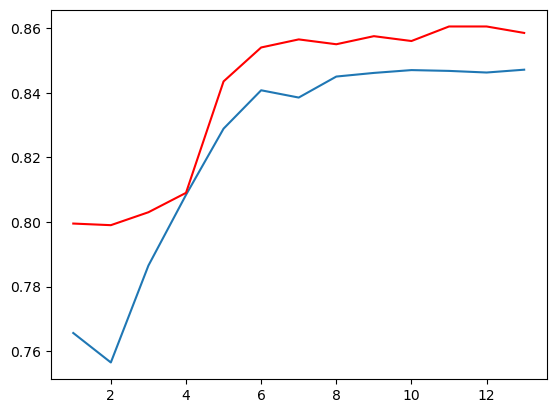

In [18]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(1,14)], tr_acc)
plt.plot([i for i in range(1,14)], ts_acc, c='red')
plt.show()

In [19]:
test_loss, test_accuracy=model.evaluate(x_test,y_test)
print('Testing data loss:- ', test_loss*100, '%')
print('Testing data accuracy:- ', test_accuracy*100,'%')

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8603 - loss: 0.3458
Testing data loss:-  35.25126278400421 %
Testing data accuracy:-  85.85000038146973 %


In [20]:
prd=model.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [21]:
prd_data=[]
for i in prd:
    if i[0]>0.5:
        prd_data.append(1)
    else:
        prd_data.append(0)

In [22]:
prd1=model.predict(x_train)

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [23]:
prd_data1=[]
for i in prd1:
    if i[0]>0.5:
        prd_data1.append(1)
    else:
        prd_data1.append(0)

In [24]:
x_test

array([[ 2.01214989,  1.24705333, -1.73331549, ...,  0.64609167,
        -1.03067011, -1.1887726 ],
       [ 0.59464162, -1.89961516,  0.68712986, ...,  0.64609167,
         0.97024255, -1.66236187],
       [-0.7193989 ,  3.05877155, -0.35020386, ...,  0.64609167,
         0.97024255,  1.6949379 ],
       ...,
       [-0.95737474,  1.81917487, -1.04175968, ...,  0.64609167,
         0.97024255, -0.19646806],
       [ 1.453424  , -1.04143285, -0.35020386, ...,  0.64609167,
        -1.03067011,  1.29278944],
       [ 0.66706905, -0.66001848,  1.72446358, ...,  0.64609167,
        -1.03067011, -0.68134887]])

In [25]:
y_test

3637    1
6003    0
3396    0
9516    0
8357    0
       ..
8335    0
229     0
9338    0
3466    0
8859    0
Name: Exited, Length: 2000, dtype: int64

In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [27]:
print("Accuracy of testing dataset:- ", accuracy_score(y_test, prd_data)*100,'%')
print("Accuracy of training dataset:- ", accuracy_score(y_train, prd_data1)*100,'%')

Accuracy of testing dataset:-  85.85000000000001 %
Accuracy of training dataset:-  85.6375 %


In [28]:
print("Classification report of testing dataset:- ", classification_report(y_test, prd_data))
print("Classification report of training dataset:- ", classification_report(y_train, prd_data1))

Classification report of testing dataset:-                precision    recall  f1-score   support

           0       0.87      0.96      0.92      1599
           1       0.75      0.44      0.56       401

    accuracy                           0.86      2000
   macro avg       0.81      0.70      0.74      2000
weighted avg       0.85      0.86      0.84      2000

Classification report of training dataset:-                precision    recall  f1-score   support

           0       0.87      0.96      0.91      6364
           1       0.76      0.44      0.55      1636

    accuracy                           0.86      8000
   macro avg       0.81      0.70      0.73      8000
weighted avg       0.85      0.86      0.84      8000



In [29]:
print("Confusion Matrix of testing dataset:- ", confusion_matrix(y_test, prd_data))
print("Confusion Matrix of training dataset:- ", confusion_matrix(y_train, prd_data1))

Confusion Matrix of testing dataset:-  [[1539   60]
 [ 223  178]]
Confusion Matrix of training dataset:-  [[6138  226]
 [ 923  713]]
